Data imports:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as px
import plotly.express as px
import plotly.io as pio
import nbformat

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Loading DataFrame 

In [3]:
df= pd.read_csv(r"marketing_camp.csv")
df.head(10000)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.000,NaN,0.0785,7993.0,0.3414,849005.0,0.640000,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium
1,CAM0002,NaN,Health,Sarawak,468792.0,33743.0,527513.000,4130.0,0.9479,9459.0,NaN,921078.0,3.780000,29.0,NaN,NaN,3.0,7.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.000,12209.0,NaN,7168.0,0.0517,51142.0,3.640000,74.0,12/4/2023,20/10/2023,1.0,2.0,Medium
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.000,34391.0,0.6157,7190.0,0.3579,191887.0,2.640000,67.0,24/4/2023,26/1/2023,5.0,6.0,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.000,13056.0,NaN,1794.0,0.0544,167241.0,1.020000,40.0,10/1/2023,1/1/2023,5.0,6.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CAM4996,Email,Automotive,Kuala Lumpur,373204.0,239182.0,947505.000,27359.0,0.4446,2725.0,0.1643,739721.0,17.287862,170.0,4/4/2023,15/12/2023,4.0,5.0,Low
4996,CAM4997,Radio,Electronics,Kuala Lumpur,81357.0,381641.0,270685.000,2575.0,0.8224,1555.0,0.2425,324435.0,1.500000,148.0,28/1/2023,26/12/2023,2.0,7.0,Low
4997,CAM4998,Radio,NaN,Kuala Lumpur,216060.0,122475.0,6042568.044,42563.0,0.5894,NaN,NaN,647246.0,NaN,340.0,7/6/2023,6/12/2023,3.0,5.0,NaN
4998,CAM4999,Social Media,Electronics,Kuala Lumpur,120531.0,433558.0,857140.000,7037.0,0.2863,3374.0,0.9039,373110.0,0.390000,76.0,2/11/2023,23/8/2023,2.0,1.0,Medium


Dataframe checking: searching of nulls or/and NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign_ID             4741 non-null   object 
 1   Channel                 4746 non-null   object 
 2   Product_Category        4733 non-null   object 
 3   Region                  4739 non-null   object 
 4   Budget                  4500 non-null   float64
 5   Spend                   4501 non-null   float64
 6   Impressions             4496 non-null   float64
 7   Clicks                  4514 non-null   float64
 8   CTR                     4502 non-null   float64
 9   Conversions             4506 non-null   float64
 10  CR                      4504 non-null   float64
 11  Revenue                 4491 non-null   float64
 12  ROI                     4505 non-null   float64
 13  Duration                4521 non-null   float64
 14  Start_Date              4741 non-null   

      Campaign_ID  Channel  Product_Category  Region  Budget  Spend  \
0           False    False             False   False   False  False   
1           False     True             False   False   False  False   
2           False    False             False   False   False  False   
3           False    False             False   False   False  False   
4           False    False             False   False   False  False   
...           ...      ...               ...     ...     ...    ...   
4995        False    False             False   False   False  False   
4996        False    False             False   False   False  False   
4997        False    False              True   False   False  False   
4998        False    False             False   False   False  False   
4999        False    False             False   False   False  False   

      Impressions  Clicks    CTR  Conversions     CR  Revenue    ROI  \
0           False    True  False        False  False    False  False   
1  

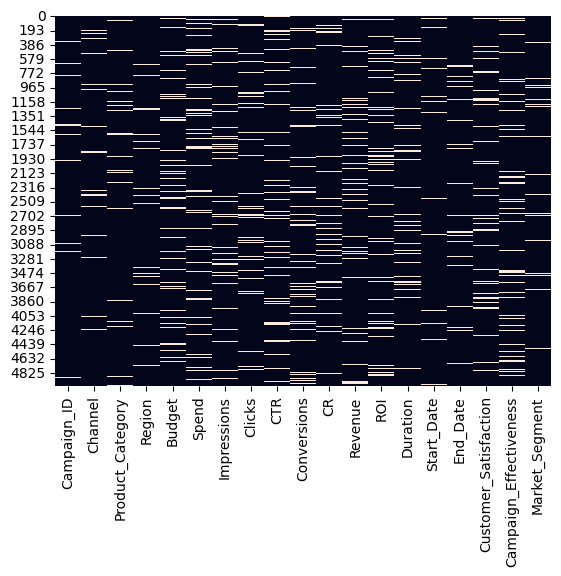

In [5]:
sns.heatmap(df.isnull(), cbar=False)
print(df.isnull())

Data description

In [6]:
df.describe()

,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,4.500000e+03,4.501000e+03,4.496000e+03,4514.000000,4502.000000,4506.000000,4504.000000,4.491000e+03,4505.000000,4521.000000,4508.000000,4510.000000
mean,3.196766e+05,2.754637e+05,6.050865e+05,27467.000985,0.585820,5591.891502,0.556345,5.962208e+05,2.816823,200.590123,3.491172,6.418550
std,7.511176e+05,3.985757e+05,1.643209e+06,23203.538244,0.800421,5629.011928,0.580404,7.834836e+05,2.769284,173.398322,4.180570,7.773072
min,1.001400e+04,1.000000e+00,1.593000e+03,104.000000,0.000500,13.000000,0.000300,0.000000e+00,0.000000,1.000000,1.000000,1.000000
25%,1.379872e+05,1.113680e+05,2.624278e+05,12713.750000,0.250425,2604.250000,0.261425,2.574585e+05,1.270000,94.000000,2.000000,3.000000
50%,2.659450e+05,2.292810e+05,5.089675e+05,26232.000000,0.500150,5076.500000,0.507450,5.093340e+05,2.610000,188.000000,3.000000,6.000000
75%,3.855895e+05,3.445920e+05,7.663295e+05,38618.250000,0.760400,7578.000000,0.755375,7.717310e+05,3.830000,278.000000,4.000000,8.000000
max,4.175610e+07,4.317430e+06,9.991660e+07,250409.021300,9.570650,67712.567350,7.369659,9.717200e+06,29.526004,1911.832921,46.055439,88.914949


Missing values

In [7]:
missing_val = df.isnull().sum()
if missing_val.sum() >0:
    print("Dataframe dont have nulls")
else:
    print("Dataframe dont  have null values")



Dataframe dont have nulls


Verifying of maximum of null values per row

In [8]:
row_nulls= df.isnull().sum(axis=1)
print(row_nulls[row_nulls>8] )

Series([], dtype: int64)


Percentage of null per row(%)

In [9]:
overall_rows = len(df)

percentage_rows = (df.isnull().sum()/overall_rows)*100
print(percentage_rows)

Campaign_ID                5.18
Channel                    5.08
Product_Category           5.34
Region                     5.22
Budget                    10.00
Spend                      9.98
Impressions               10.08
Clicks                     9.72
CTR                        9.96
Conversions                9.88
CR                         9.92
Revenue                   10.18
ROI                        9.90
Duration                   9.58
Start_Date                 5.18
End_Date                   5.14
Customer_Satisfaction      9.84
Campaign_Effectiveness     9.80
Market_Segment             5.24
dtype: float64


Imputation of null values in numeric columns with KNN

In [10]:
column_num= KNNImputer(n_neighbors=5)
column1=["Budget", "Revenue", "Spend", "Impressions","CTR", "Conversions","CR", "ROI", "Duration", "Clicks", "Customer_Satisfaction", "Campaign_Effectiveness"]

df[column1]= column_num.fit_transform(df[column1])
print(df.isnull().sum())

Campaign_ID               259
Channel                   254
Product_Category          267
Region                    261
Budget                      0
Spend                       0
Impressions                 0
Clicks                      0
CTR                         0
Conversions                 0
CR                          0
Revenue                     0
ROI                         0
Duration                    0
Start_Date                259
End_Date                  257
Customer_Satisfaction       0
Campaign_Effectiveness      0
Market_Segment            262
dtype: int64


In [11]:
id_nulls = "ID" + pd.Series(df.index + 1, index=df.index).astype(str).str.zfill(4)
df["Campaign_ID"] = df["Campaign_ID"].fillna(id_nulls)

print(id_nulls)
print(df.isnull().sum())

0       ID0001
1       ID0002
2       ID0003
3       ID0004
4       ID0005
         ...  
4995    ID4996
4996    ID4997
4997    ID4998
4998    ID4999
4999    ID5000
Length: 5000, dtype: object
Campaign_ID                 0
Channel                   254
Product_Category          267
Region                    261
Budget                      0
Spend                       0
Impressions                 0
Clicks                      0
CTR                         0
Conversions                 0
CR                          0
Revenue                     0
ROI                         0
Duration                    0
Start_Date                259
End_Date                  257
Customer_Satisfaction       0
Campaign_Effectiveness      0
Market_Segment            262
dtype: int64


Imputation of missing values with mode in each categorical columns

In [12]:
column_imputation = ["Channel", "Product_Category", "Region", "Start_Date", "End_Date"]

for i in column_imputation:
    df[i].fillna(df[i].mode()[0], inplace=True)

print(df.isnull().sum())


Campaign_ID                 0
Channel                     0
Product_Category            0
Region                      0
Budget                      0
Spend                       0
Impressions                 0
Clicks                      0
CTR                         0
Conversions                 0
CR                          0
Revenue                     0
ROI                         0
Duration                    0
Start_Date                  0
End_Date                    0
Customer_Satisfaction       0
Campaign_Effectiveness      0
Market_Segment            262
dtype: int64


C:\Users\Ral\AppData\Local\Temp\ipykernel_9332\3751291561.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


Mode

In [13]:
for i in ["Channel", "Product_Category", "Region", "Start_Date", "End_Date"]:
    print(f"Mode of {i}: {df[i].mode()[0]}")

Mode of Channel: Billboard
Mode of Product_Category: Electronics
Mode of Region: Kuala Lumpur
Mode of Start_Date: 11/9/2023
Mode of End_Date: 7/7/2023


Heathmap

<Axes: >

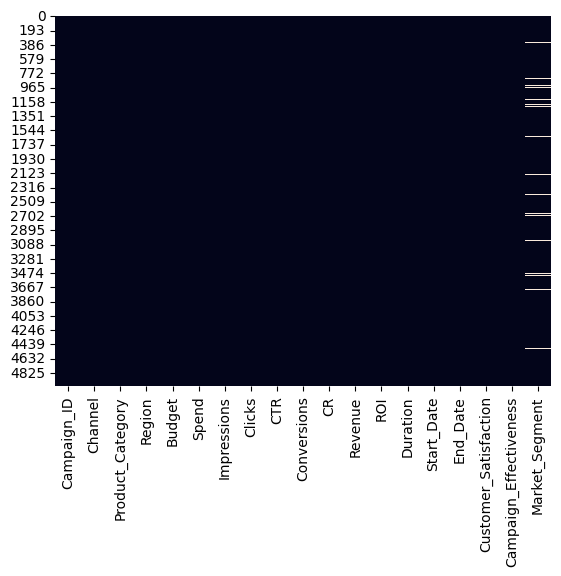

In [14]:
sns.heatmap(df.isnull(), cbar=False)

Outlieranalysis with boxplot graphics

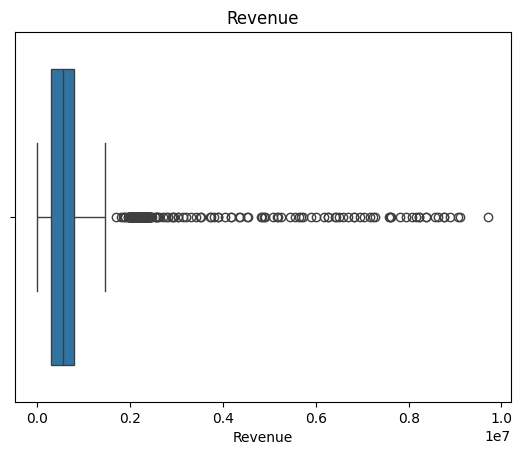

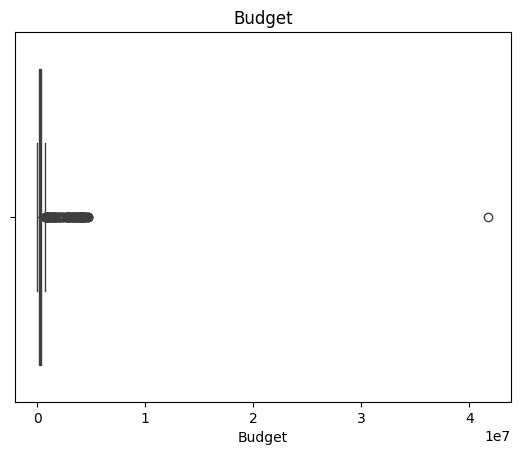

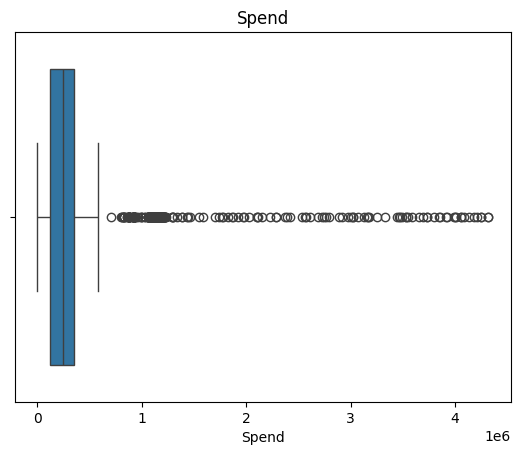

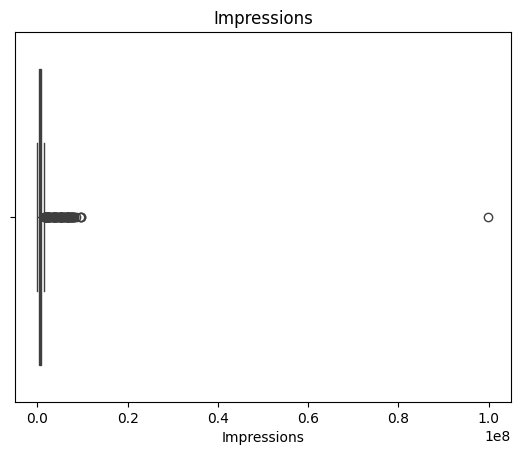

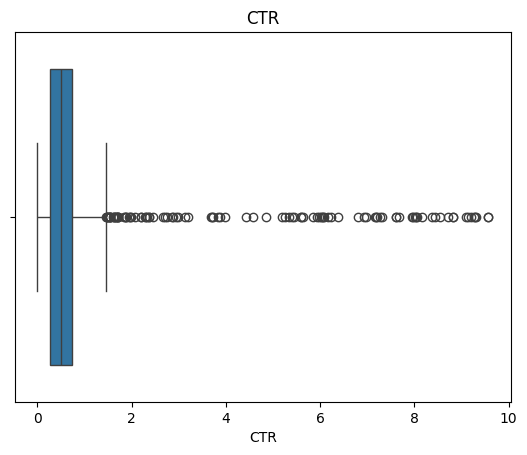

In [15]:
sns.boxplot(x= df["Revenue"]),plt.title("Revenue")
plt.show()

sns.boxplot(x= df["Budget"]),plt.title("Budget")
plt.show()  

sns.boxplot(x= df["Spend"]),plt.title("Spend")
plt.show()  

sns.boxplot(x= df["Impressions"]),plt.title("Impressions")
plt.show()  

sns.boxplot(x= df["CTR"]),plt.title("CTR")
plt.show()

Logarithmic boxplot 

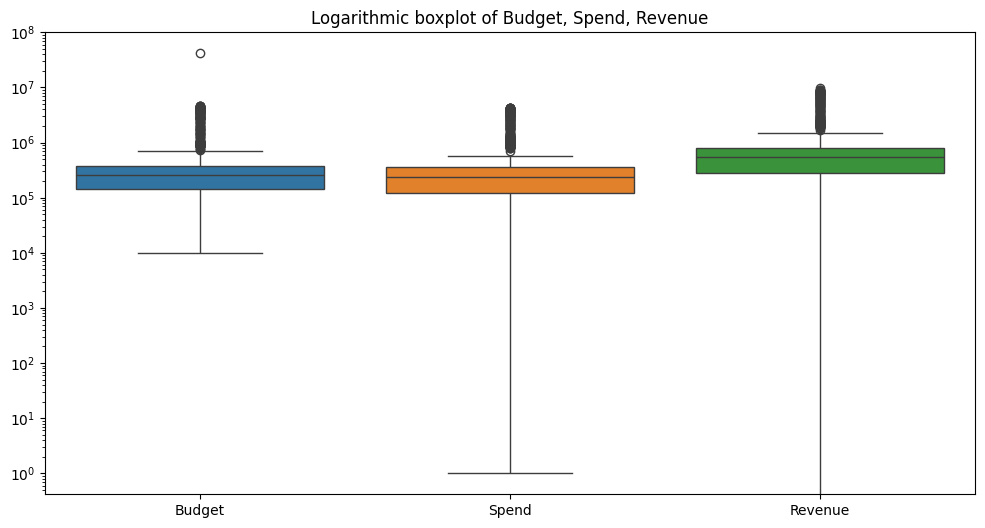

In [16]:
plt.figure(figsize=(12, 6)),sns.boxplot(data=df[["Budget", "Spend", "Revenue"]]), plt.yscale("log"),plt.title("Logarithmic boxplot of Budget, Spend, Revenue")
plt.show()

Detection of outliers with IQR

In [17]:
columns = ["Revenue", "Budget", "Spend"]

for i in columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = df[(df[i] < lower_limit) | (df[i] > upper_limit)]
    

    print(f"Column: {i}")
    print(f"Limit: {lower_limit:.2f} to {upper_limit:.2f}")
    print(f"Number of outliers: {len(outliers)}\n")


Column: Revenue
Limit: -478359.50 to 1558602.50
Number of outliers: 293

Column: Budget
Limit: -206329.73 to 728872.88
Number of outliers: 136

Column: Spend
Limit: -221424.50 to 698515.50
Number of outliers: 269



Outlier filtration by columns

In [18]:
columns = ["Revenue", "Budget", "Spend"]

for i in columns:
    outliers_del = df[(df[i] > lower_limit) & (df[i] < upper_limit)]
    print(f"Columns: {i} - rows without outliers {len(outliers_del)}")


df_outlier_del = df[~((df[["Budget", "Spend", "Revenue"]] < lower_limit) | 
                                (df[["Budget", "Spend", "Revenue"]] > upper_limit)).any(axis=1)]

print("Raw number of rows after outlier filtration:", df.shape[0])
print("Total number of rows before outlier filtration:", df_outlier_del.shape[0])

Columns: Revenue - rows without outliers 3297
Columns: Budget - rows without outliers 4862
Columns: Spend - rows without outliers 4731
Raw number of rows after outlier filtration: 5000
Total number of rows before outlier filtration: 3028


Histograms & KDE graphics

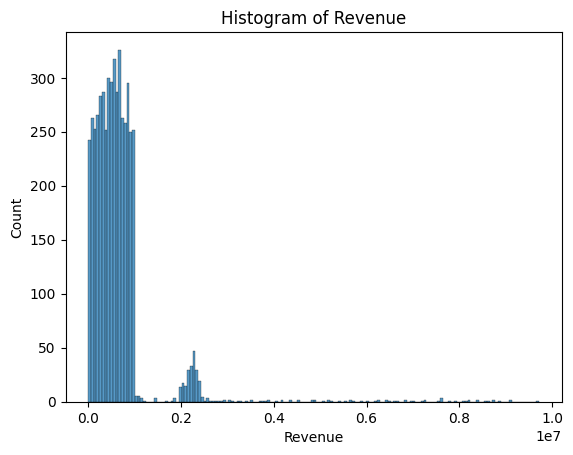

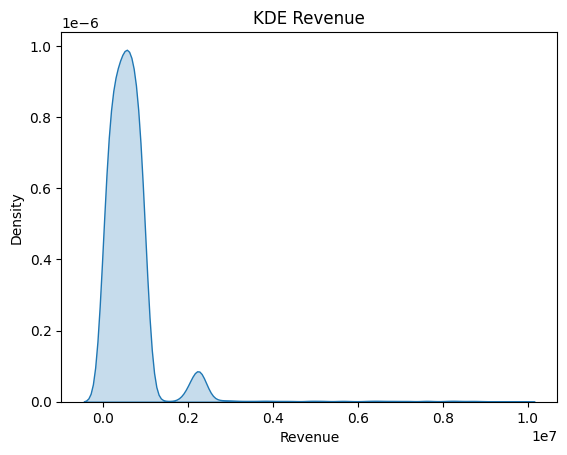

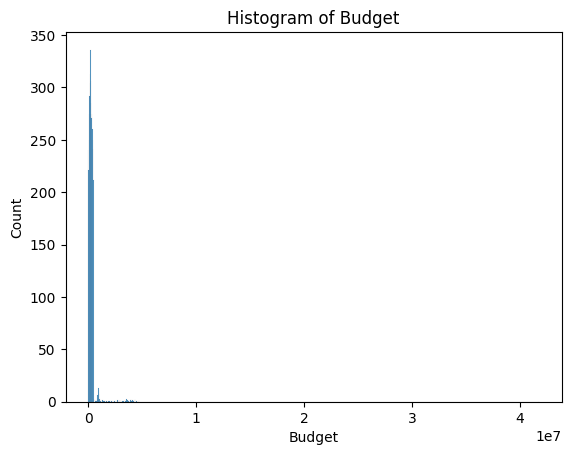

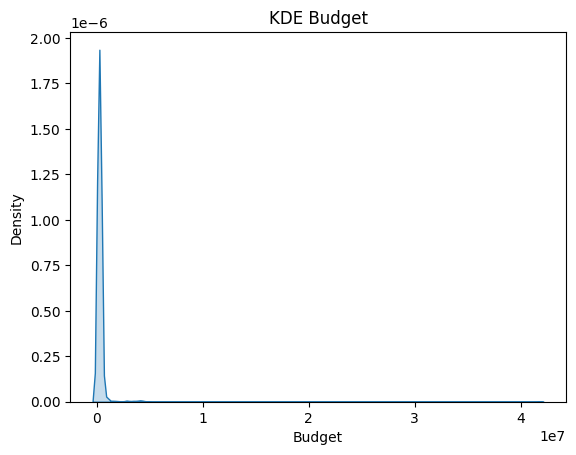

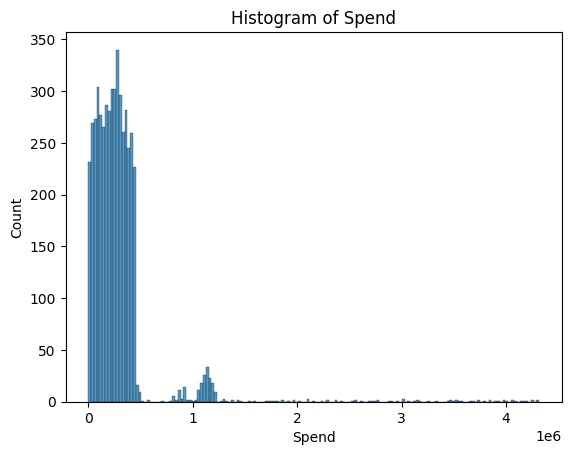

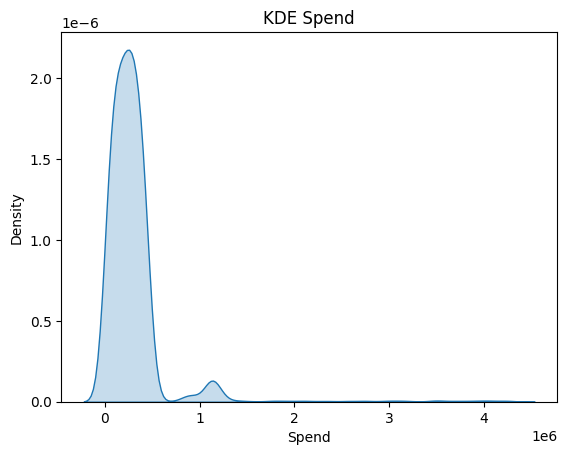

In [19]:
columns = ["Revenue", "Budget", "Spend"]

for i in columns:
    sns.histplot(df[i], kde=False), plt.title(f'Histogram of {i}')
    plt.show()
    
    sns.kdeplot(df[i], fill=True), plt.title(f'KDE {i}')
    plt.show()


Countplot per categoric column

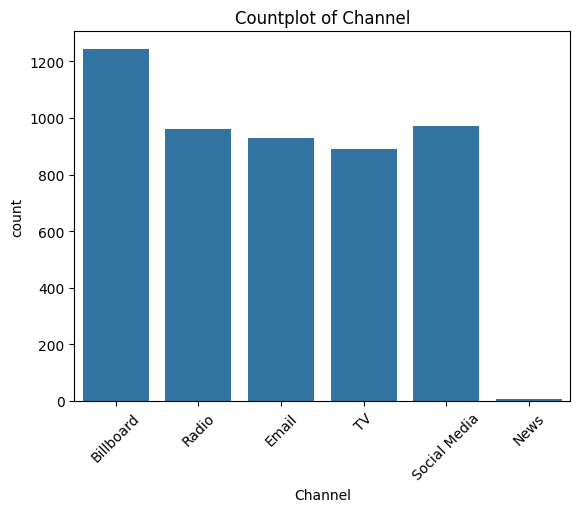

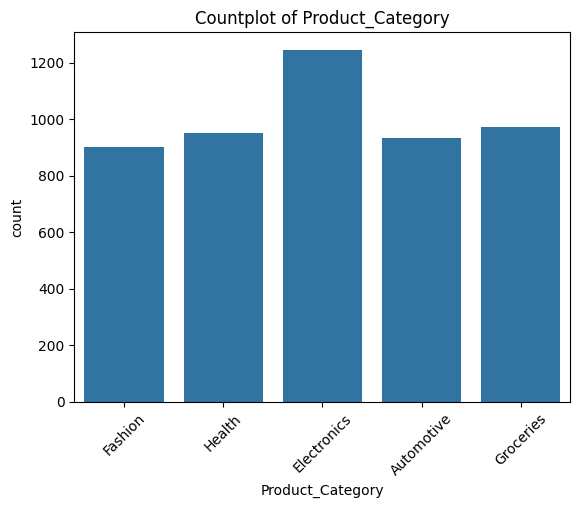

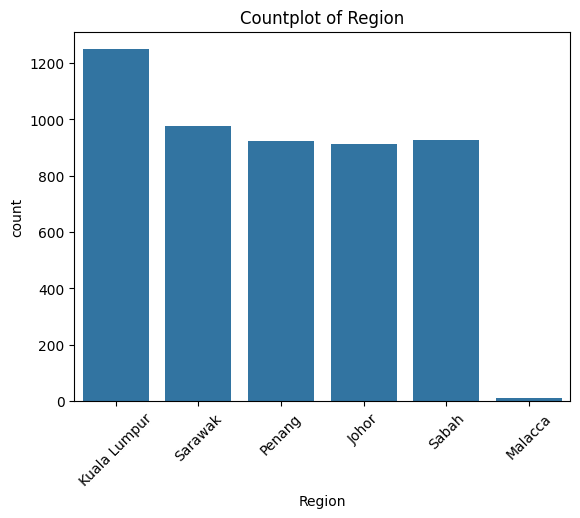

In [20]:
columns = ["Channel", "Product_Category", "Region"]

for i in columns:
    sns.countplot(x=df[i]), plt.xticks(rotation=45), plt.title(f"Countplot of {i}")
    plt.show()

Logarithmic boxplot

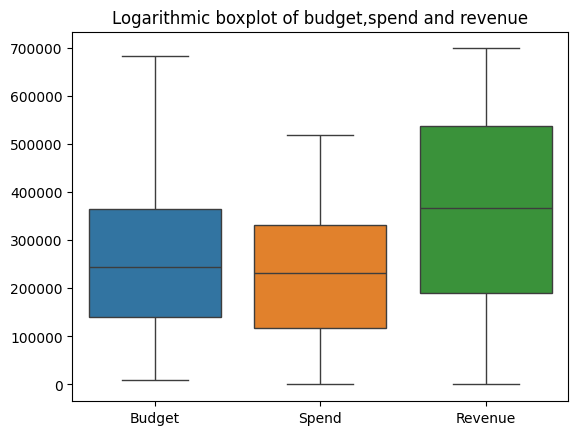

In [21]:
sns.boxplot(data=df_outlier_del[["Budget", "Spend", "Revenue"]]), plt.title("Logarithmic boxplot of budget,spend and revenue")
plt.show()

Normalizing "Channel"

In [22]:
df["Channel"]= df["Channel"].str.lower()
df.head()

df["Channel"]= df["Channel"].str.strip()
df.head()

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,25595.8,0.07850,7993.0,0.34140,849005.0,0.64,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium
1,CAM0002,billboard,Health,Sarawak,468792.0,33743.0,527513.0,4130.0,0.94790,9459.0,0.41578,921078.0,3.78,29.0,11/9/2023,7/7/2023,3.0,7.0,Medium
2,CAM0003,radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,0.60484,7168.0,0.05170,51142.0,3.64,74.0,12/4/2023,20/10/2023,1.0,2.0,Medium
3,CAM0004,email,Electronics,Penang,345431.0,329112.0,108570.0,34391.0,0.61570,7190.0,0.35790,191887.0,2.64,67.0,24/4/2023,26/1/2023,5.0,6.0,High
4,CAM0005,radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.0,13056.0,0.54836,1794.0,0.05440,167241.0,1.02,40.0,10/1/2023,1/1/2023,5.0,6.0,Low


In [23]:
columns = ["Channel", "Product_Category", "Region"]

for i in columns:
    print(f"Value count {i}:")
    print(df[i].value_counts())

Value count Channel:
Channel
billboard       1244
social media     970
radio            960
email            928
tv               892
news               6
Name: count, dtype: int64
Value count Product_Category:
Product_Category
Electronics    1245
Groceries       972
Health          951
Automotive      932
Fashion         900
Name: count, dtype: int64
Value count Region:
Region
Kuala Lumpur    1249
Sarawak          975
Sabah            927
Penang           922
Johor            914
Malacca           13
Name: count, dtype: int64


Change to categorical to numerical values & graphic them


In [24]:
code= LabelEncoder()
df['Start_Date']=pd.to_datetime(df['Start_Date'],errors='coerce', dayfirst=True)
df['End_Date']=pd.to_datetime(df['End_Date'],errors='coerce', dayfirst=True)


In [25]:
columns = ["Product_Category", "Channel", "Region"]

for i in columns:
    df[f'{i}_Code'] = code.fit_transform(df[i])
    df[i].info()
    print(df[f"{i}_Code"])


<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Product_Category
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB
0       2
1       4
2       1
3       1
4       2
       ..
4995    0
4996    1
4997    1
4998    1
4999    0
Name: Product_Category_Code, Length: 5000, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Channel
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB
0       0
1       0
2       3
3       1
4       3
       ..
4995    1
4996    3
4997    3
4998    4
4999    5
Name: Channel_Code, Length: 5000, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Region
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB
0       1
1       5
2       3
3       3
4       1
       ..


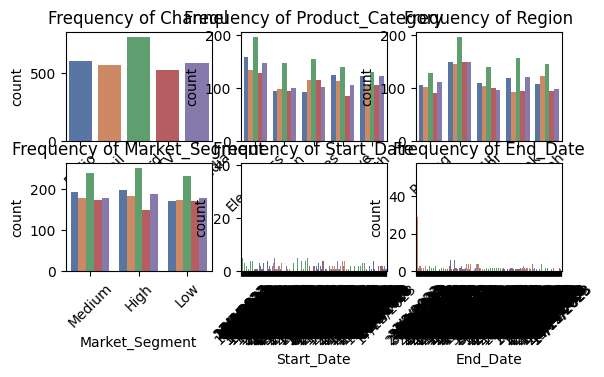

In [26]:
categorical_columns = ["Channel", "Product_Category", "Region", "Market_Segment", "Start_Date", "End_Date"]

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i),sns.countplot(data=df_outlier_del, x=column, hue="Channel", palette="deep", legend = None), plt.title(f"Frequency of {column}"),plt.xticks(rotation=45)

plt.show()


Bivariate analysis

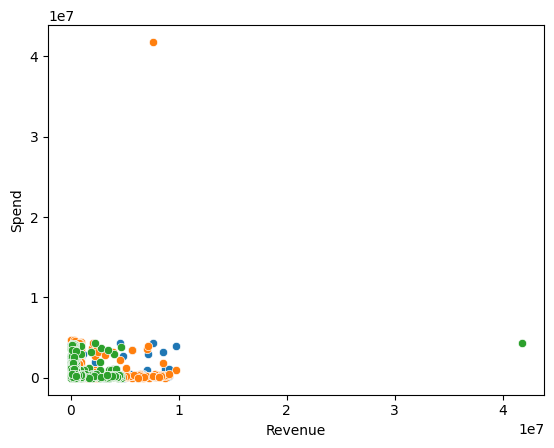

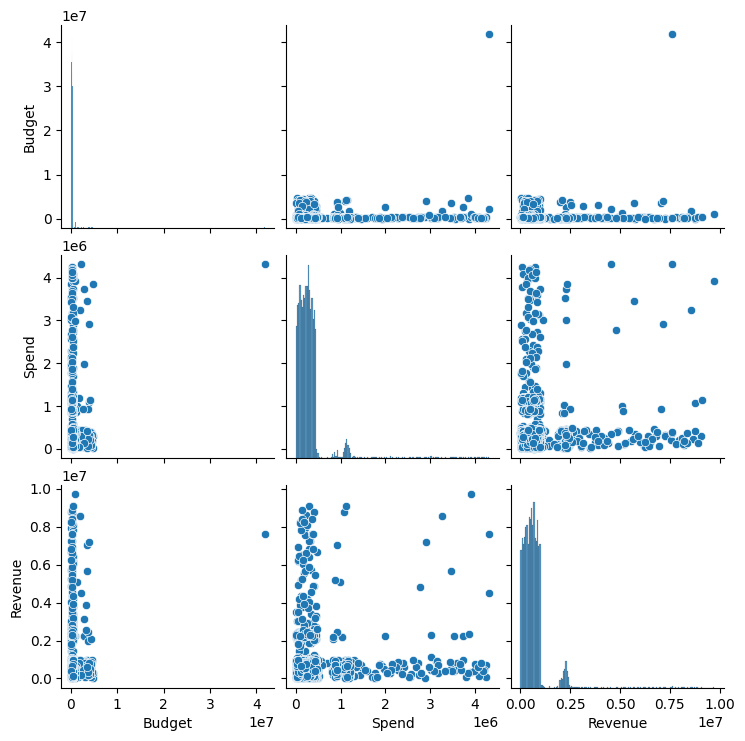

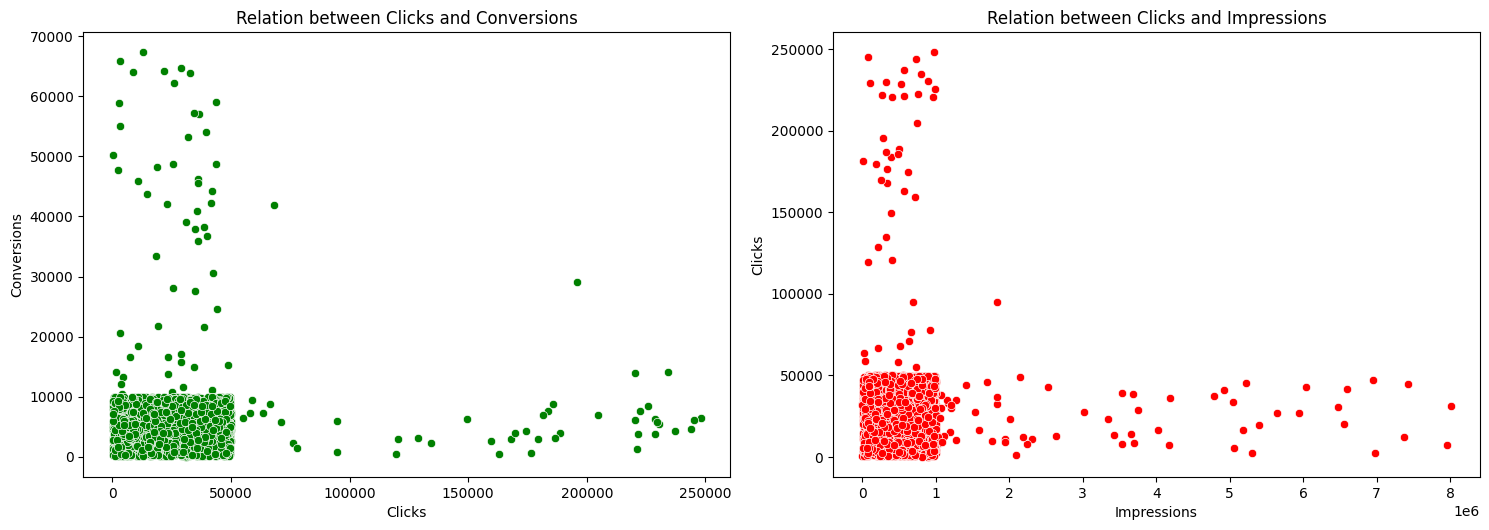

,Revenue,Spend
Revenue,1.000000,0.084609
Spend,0.084609,1.000000


In [27]:
scatter_columns = [("Revenue", "Spend"), ("Revenue", "Budget"), ("Budget", "Spend")]

for x_i, y_i in scatter_columns:
    sns.scatterplot(x=df[x_i], y=df[y_i])
plt.show()

sns.pairplot(df[["Budget", "Spend", "Revenue"]])
plt.show()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3), sns.scatterplot(data=df_outlier_del, x="Clicks", y="Conversions", color="green"), plt.title("Relation between Clicks and Conversions"), plt.xlabel("Clicks"), plt.ylabel("Conversions")

plt.subplot(2, 2, 4), sns.scatterplot(data=df_outlier_del, x="Impressions", y="Clicks", color="red"), plt.title("Relation between Clicks and Impressions"),plt.xlabel("Impressions"),plt.ylabel("Clicks")

plt.tight_layout()
plt.show()

df[['Revenue', 'Spend']].corr()

Categoric & Numeric graphic

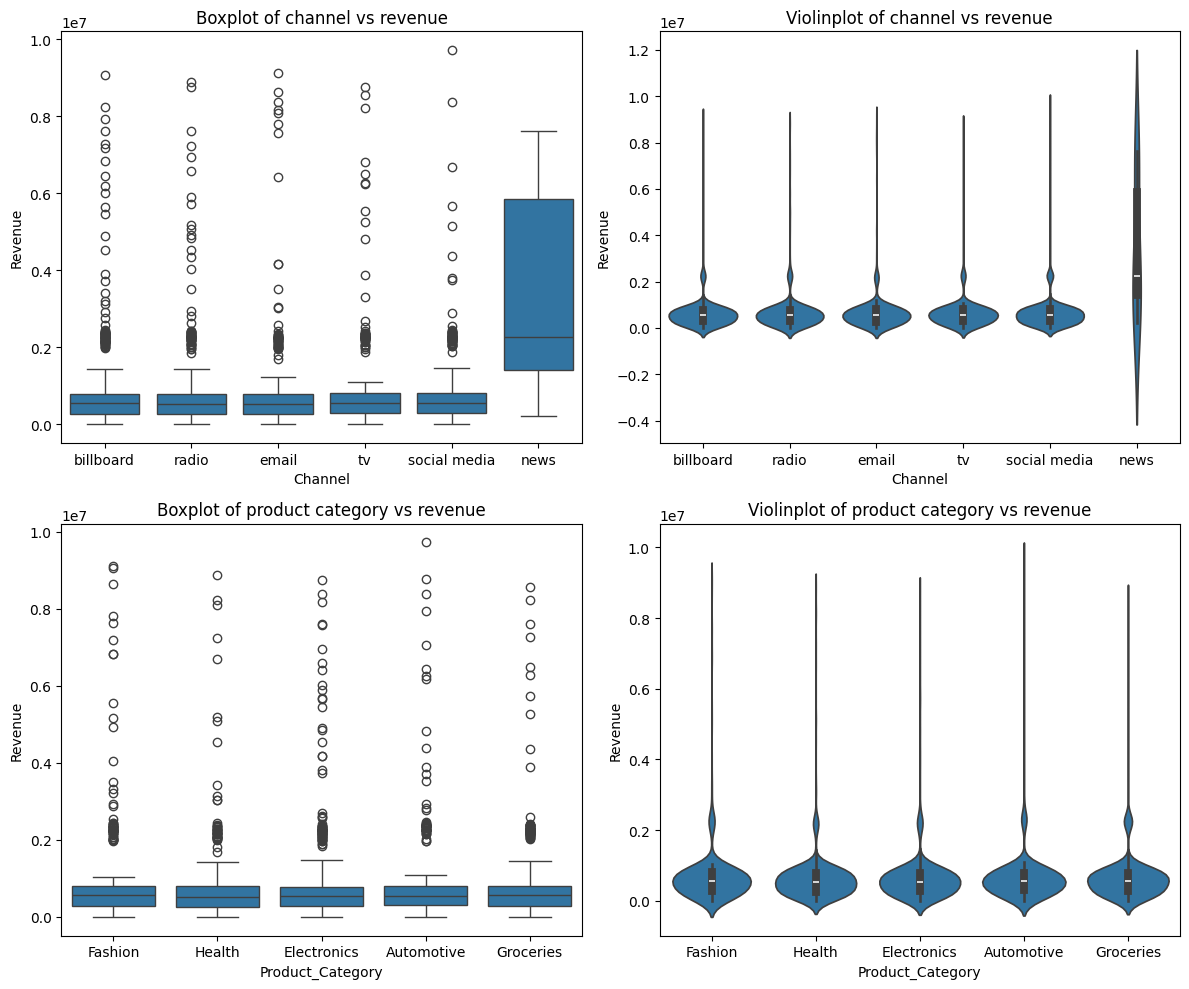

In [28]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1), sns.boxplot(x=df["Channel"], y=df["Revenue"]), plt.title("Boxplot of channel vs revenue")

plt.subplot(2, 2, 2),sns.violinplot(x=df["Channel"], y=df["Revenue"]),plt.title("Violinplot of channel vs revenue")


plt.subplot(2, 2, 3),sns.boxplot(x=df["Product_Category"], y=df["Revenue"]),plt.title("Boxplot of product category vs revenue")

plt.subplot(2, 2, 4), sns.violinplot(x=df["Product_Category"], y=df["Revenue"]),plt.title("Violinplot of product category vs revenue")

plt.tight_layout()
plt.show()


Heatmap

<Axes: xlabel='Region', ylabel='Channel'>

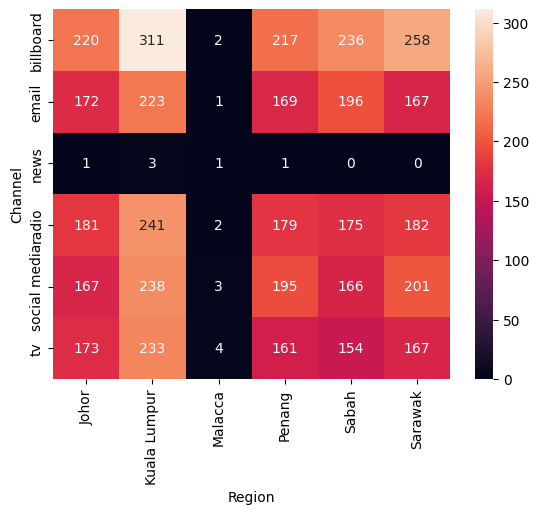

In [29]:
sns.heatmap(pd.crosstab(df["Channel"], df["Region"]), annot=True, fmt="d")

Multivariated graphic

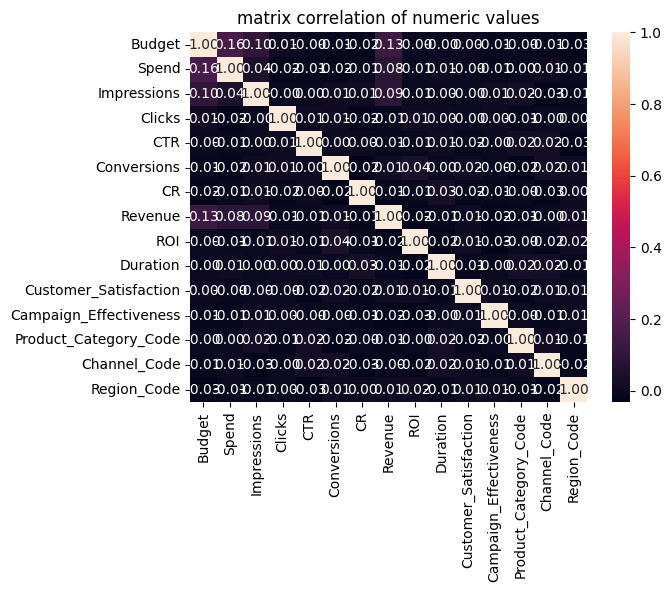

In [30]:
sns.heatmap(df.select_dtypes(include=["float64", "int64"]).corr(), annot=True, fmt=".2f")
plt.title("matrix correlation of numeric values")
plt.show()


Clubster analysis

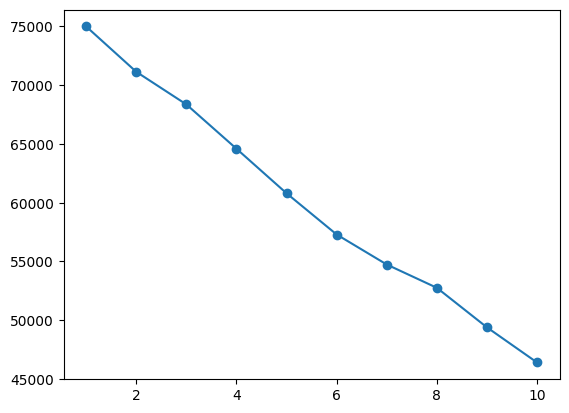

In [31]:
df_scale = StandardScaler().fit_transform(df.select_dtypes(include=["float64", "int64"]))

club = [KMeans(n_clusters=i, random_state=42).fit(df_scale).inertia_ for i in range(1, 11)]

plt.plot(range(1, 11), club, marker="o")
plt.show()

Data Visualization with Barplot&Plotly: ROI & Incoming

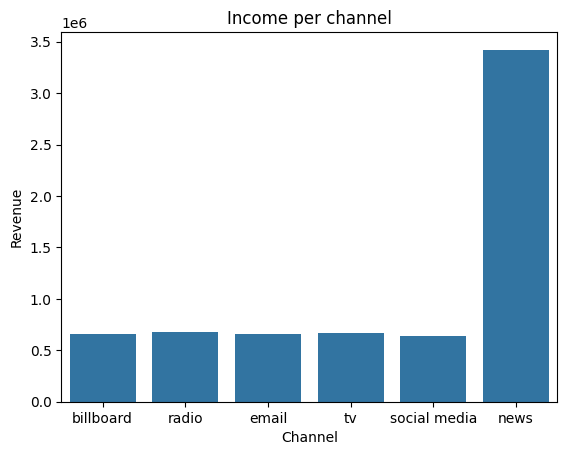

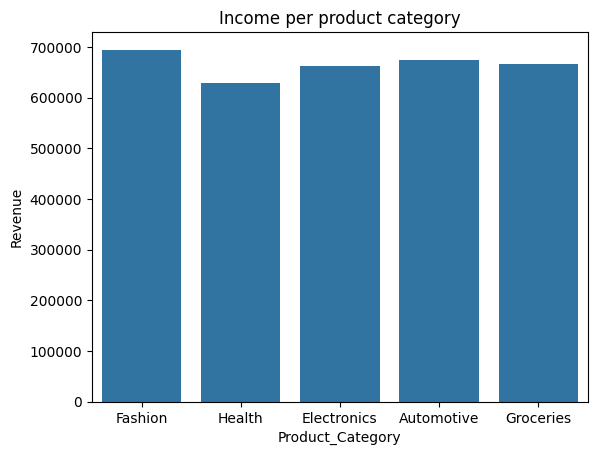

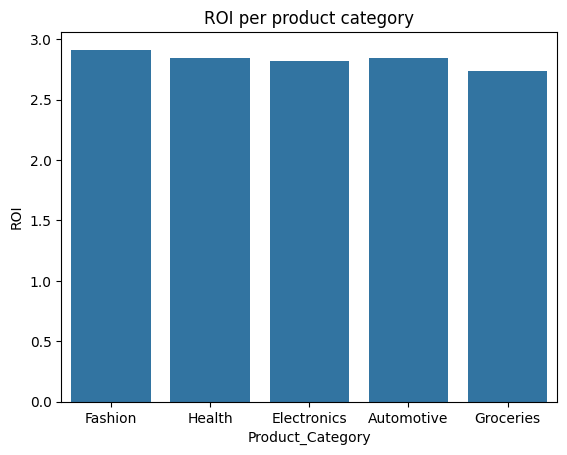

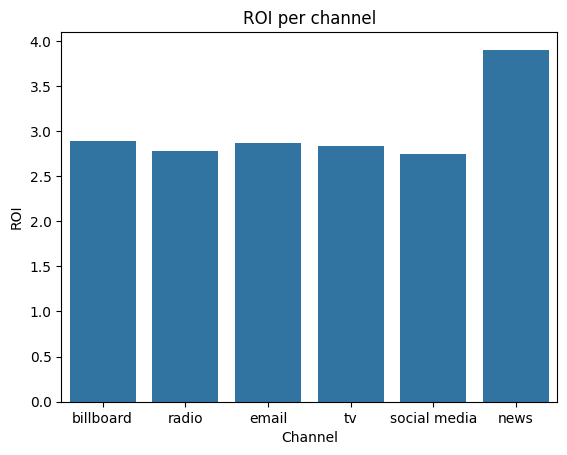

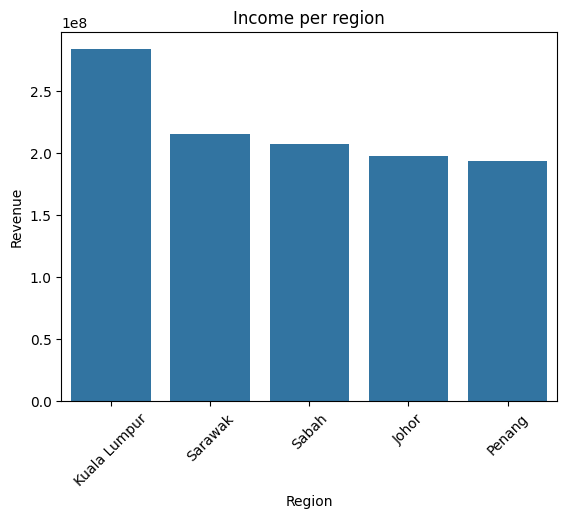

In [32]:
sns.barplot(x="Channel", y="Revenue", data=df, errorbar=None),plt.title("Income per channel")
plt.show()

sns.barplot(x="Product_Category", y="Revenue", data=df, errorbar=None),plt.title("Income per product category")
plt.show()

sns.barplot(x="Product_Category", y="ROI", data=df, errorbar=None),plt.title("ROI per product category")
plt.show()

sns.barplot(x="Channel", y="ROI", data=df, errorbar=None),plt.title("ROI per channel")
plt.show()

region_performance = df_outlier_del.groupby("Region").agg({"Revenue": "sum"}).sort_values(by="Revenue", ascending=False)
sns.barplot(x=region_performance.index, y="Revenue", data=region_performance),plt.title("Income per region"),plt.xticks(rotation=45)
plt.show()


In [33]:
fig = px.bar(df_outlier_del, x="Channel", y="Revenue", color="Channel", title="Income per channel")
fig.update_layout(xaxis_title="Channel", yaxis_title="Income (Revenue)")
fig.show()

fig = px.bar(df_outlier_del, x="Product_Category", y="ROI", color="Product_Category", title="ROI per product category")
fig.update_layout(xaxis_title="Product category", yaxis_title="ROI")
fig.show()

Relation between impressions and clicks

<Axes: xlabel='Start_Date'>

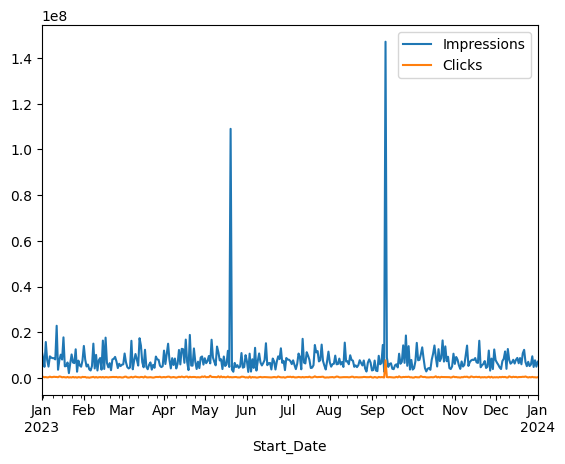

In [34]:
df["Start_Date"]= pd.to_datetime(df["Start_Date"], dayfirst=True)
suma= df.groupby("Start_Date")[["Impressions", "Clicks"]].sum()
suma.plot()

In [35]:
fig=px.scatter_3d(data_frame=df_outlier_del, x="Revenue", y="Spend", z="ROI", color="Clicks", title="3D", template="simple_white")
fig.show()

Conclusion of relations between variables

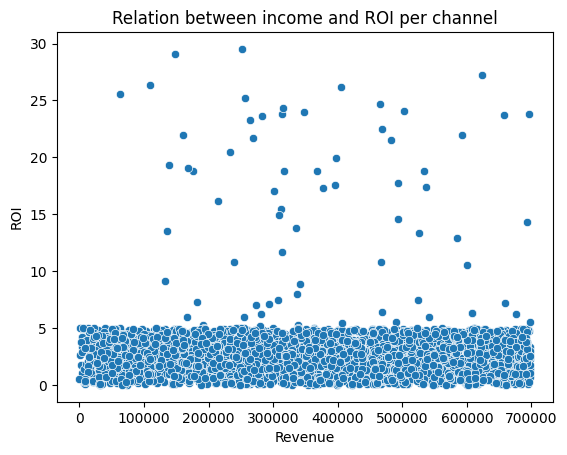

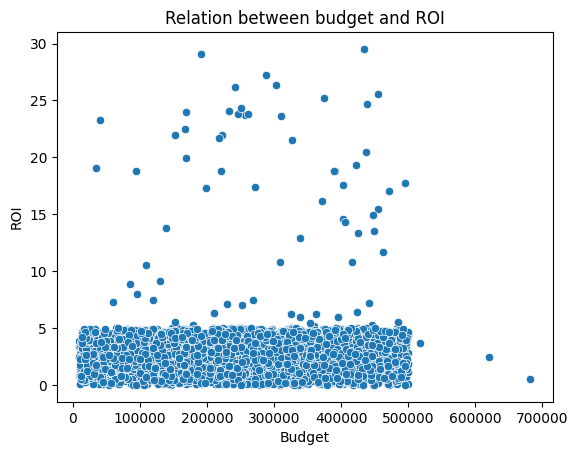

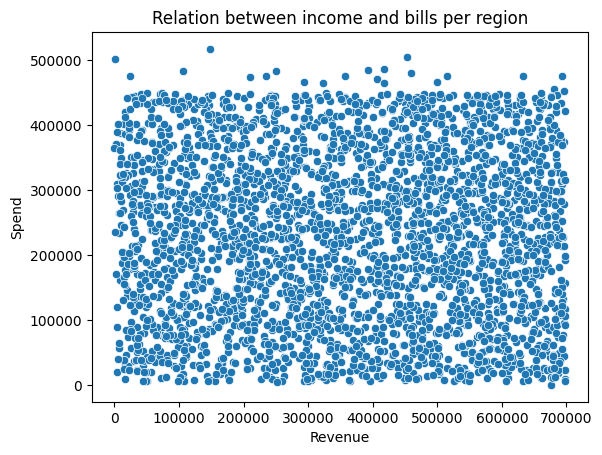

In [36]:
sns.scatterplot(x="Revenue", y="ROI",data=df_outlier_del), plt.title("Relation between income and ROI per channel")
plt.show()

sns.scatterplot(x="Budget", y="ROI", data=df_outlier_del),plt.title("Relation between budget and ROI")
plt.show()

sns.scatterplot(x="Revenue", y="Spend",data=df_outlier_del), plt.title("Relation between income and bills per region")
plt.show()

In [37]:
average_income_by_region = df_outlier_del.groupby("Region")["Revenue"].mean()
print(average_income_by_region)


Region
Johor           359733.914951
Kuala Lumpur    359683.260580
Penang          359045.132406
Sabah           364792.298629
Sarawak         369535.815011
Name: Revenue, dtype: float64


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Campaign_ID             5000 non-null   object        
 1   Channel                 5000 non-null   object        
 2   Product_Category        5000 non-null   object        
 3   Region                  5000 non-null   object        
 4   Budget                  5000 non-null   float64       
 5   Spend                   5000 non-null   float64       
 6   Impressions             5000 non-null   float64       
 7   Clicks                  5000 non-null   float64       
 8   CTR                     5000 non-null   float64       
 9   Conversions             5000 non-null   float64       
 10  CR                      5000 non-null   float64       
 11  Revenue                 5000 non-null   float64       
 12  ROI                     5000 non-null   float64 